<a href="https://colab.research.google.com/github/jpanahatan/Pemrograman-Python/blob/main/Adrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [22]:
ls

'1101180481 Adrian Jose Panahatan TT-42-04.pdf'
'1101180481 Registrasi _ Telkom University.pdf'
 16038003246761596130232373378342.jpg
 16038005679224285189226141698378.jpg
 3scene@
'Adrian Jose P - 1101180481.pdf'
'Adrian Jose PANAHATAN_1101180481_TT-41-G13 (Tugas 10).pdf'
'ADRIAN JOSE PANAHATAN 1101180481 TT-42-04 (KSM).pdf'
'ADRIAN JOSE PANAHATAN_1101180481_TT-42-04-UTS SISKOM 2020.pdf'
'Bukti hadir (1).JPG'
'Bukti hadir (2).JPG'
'Bukti hadir.JPG'
'Cara penyelesaian UTS SKO.pdf'
 Classroom/
'Colab Notebooks'/
 Geladi.jpg
'Getting started.pdf'
'LA_GELADI2020_7_1101180481_ADRIAN JOSE PANAHATAN.pdf'
'LH_GELADI2020_1_1101180481_ADRIAN JOSE PANAHATAN.pdf'
'LH_GELADI2020_2_1101180481_ADRIAN JOSE PANAHATAN.pdf'
'LH_GELADI2020_3_1101180481_ADRIAN JOSE PANAHATAN.pdf'
'LH_GELADI2020_4_1101180481_ADRIAN JOSE PANAHATAN.pdf'
'LH_GELADI2020_5_1101180481_ADRIAN JOSE PANAHATAN.pdf'
'LH_GELADI2020_6_1101180481_ADRIAN JOSE PANAHATAN.pdf'
 model_scene/
'Practicum Assistant of Electronic Laboratory 1101

In [23]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense 
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [24]:
# grab all image paths in the input dataset directory, then initialize

# our list of images and corresponding class labels 
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [25]:
# loop over our input images

for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale 
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path. sep)[-2] 
  labels.append(label)

In [26]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [27]:
# encode the labels, converting them from strings to integers 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [28]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [29]:
# perform a troining and testing split, using 75% of the data for 
# training and 25% for evaluation

(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [30]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential (
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [32]:
# train the model using the Adam optimizer
print ("[INFO] training network...") 
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, 
  metrics=["accuracy"])

H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 0s 16ms/step - loss: 1.0231 - accuracy: 0.4909 - val_loss: 1.0204 - val_accuracy: 0.4895
Epoch 2/25
23/23 [==============================] - 0s 11ms/step - loss: 0.8576 - accuracy: 0.5907 - val_loss: 0.9221 - val_accuracy: 0.5654
Epoch 3/25
23/23 [==============================] - 0s 11ms/step - loss: 0.8020 - accuracy: 0.6160 - val_loss: 0.8476 - val_accuracy: 0.5781
Epoch 4/25
23/23 [==============================] - 0s 11ms/step - loss: 0.7023 - accuracy: 0.7089 - val_loss: 0.8050 - val_accuracy: 0.6878
Epoch 5/25
23/23 [==============================] - 0s 11ms/step - loss: 0.6640 - accuracy: 0.7187 - val_loss: 1.3416 - val_accuracy: 0.4852
Epoch 6/25
23/23 [==============================] - 0s 11ms/step - loss: 0.7529 - accuracy: 0.6723 - val_loss: 0.7903 - val_accuracy: 0.6751
Epoch 7/25
23/23 [==============================] - 0s 11ms/step - loss: 0.6084 - accuracy: 0.7539 - val_loss: 0.8259 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


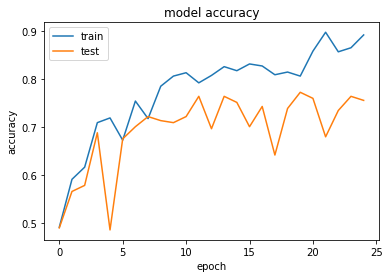

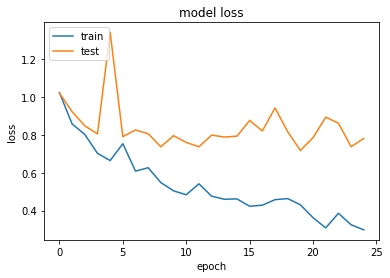

In [33]:
import matplotlib.pyplot as plt

print(H.history.keys()) 
# summarize history for accuracy
plt.plot(H.history['accuracy']) 
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss 
plt.plot(H.history['loss']) 
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [34]:
# evaluate the network

print("[INFO] evaluating network...") 
predictions = model.predict(testX, batch_size=32) 
print(classification_report(testY.argmax (axis=1),
  predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.79      0.67      0.72        88
      forest       0.85      0.77      0.81        95
     highway       0.62      0.87      0.72        54

    accuracy                           0.76       237
   macro avg       0.75      0.77      0.75       237
weighted avg       0.77      0.76      0.76       237



In [37]:
model.save('model_scene')

INFO:tensorflow:Assets written to: model_scene/assets


In [38]:
import cv2
import matplotlib.pyplot as plt
image1='Geladi.jpg'

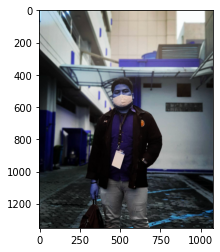

In [39]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [40]:
image_testing = Image.open ('Geladi.jpg')
image_testing = np.array(image_testing.resize((64,64))) / 255.0
image_testing.shape

(64, 64, 3)

In [41]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [42]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.3957299  0.01560836 0.5886617 ]]
['highway']
